<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Principles of Data Visualization, Part 1

_Authors: Matt Brems, Noelle Brown_

<img src="../images/viz_imp.png" alt="drawing" width="400"/>

Visualizing data is a powerful way to help your audience remember what you are saying and to help you better understand your data ([*source*](https://www.finereport.com/en/data-visualization/data-visualization-2.html)).

### Packages Today
- [NumPy](http://www.numpy.org/): Numerical Python - scalars, vectors, matrices, etc. and tools for manipulating them.
- [Pandas](https://pandas.pydata.org/): Python Data Analysis Library - storing/"munging" (cleaning/transforming) data.
- [Matplotlib](https://matplotlib.org/): Python plotting library - this is (unsurprisingly) what we'll use to plot things!
- [Seaborn](https://seaborn.pydata.org/): Statistical Visualization Library - this is commonly used for more complicated visuals (we'll ignore most of these because they're often less accessible to stakeholders).

<details><summary>Let's get started with a question: what is the point of creating a visualization for data?</summary>
    
- "Use a picture. It's worth a thousand words." - Tess Flanders, 1911
- We generally use visualizations in order to efficiently and/or effectively communicate information.
</details>

<details><summary>We often generate data visualizations for exploratory analysis or explanatory analysis. What is the difference?</summary>
    
- Exploratory analysis is when we are exploring our data, like identifying patterns or discovering outliers.
- Explanatory analysis is when we are communicating (explaining) our results to a client, boss, stakeholder, etc.
</details>

Today, we will focus on **explanatory analysis**. Many of these tools will be transferable to exploratory analysis.

### LEARNING OBJECTIVES 
1. Identify what type of visualization may be appropriate for a given scenario.
2. Generate text, bar graphs, histograms, tables, heatmaps, scatterplots, line plots in `matplotlib`.
3. Critique data visualizations and implement changes in `matplotlib`.

In [1]:
# Importing NumPy and Pandas.
import numpy as np
import pandas as pd

# Importing matplotlib.pyplot - the specific plotting API 
# https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Import Seaborn.
import seaborn as sns

<details><summary>Let's bring in the Stock data.</summary>
    
![](https://i.ytimg.com/vi/if-2M3K1tqk/maxresdefault.jpg)
</details>

In [2]:
# Bring in stock data.
stocks = pd.read_csv('../data/stocks_data.csv')

# Convert stock date to datetime.
stocks['date'] = pd.to_datetime(stocks['date'])

In [3]:
# Check out the first five rows of the stocks data.

stocks.head()

,weekday,date,high,low,close,volume,ticker
0,Friday,1998-01-02,3.95098,3.28236,3.95098,24947201.10,AAPL
1,Monday,1998-01-05,4.02635,3.69325,3.89020,22344145.08,AAPL
2,Tuesday,1998-01-06,4.98432,3.58628,4.60502,63150252.55,AAPL
3,Wednesday,1998-01-07,4.68040,4.20871,4.24032,36978255.52,AAPL
4,Thursday,1998-01-08,4.52965,4.11875,4.39107,27687622.95,AAPL


In [5]:
# Display the different weekdays and how frequently we observe each of them.

stocks['weekday'].value_counts(normalize = True)

Wednesday    0.205867
Tuesday      0.204436
Thursday     0.201824
Friday       0.200322
Monday       0.187551
Name: weekday, dtype: float64

In [20]:
# Display the different stock tickers and how frequently we observe each of them.

stocks['ticker'].value_counts()

AAPL    3926
INTC    3926
DOW     3926
SBUX    3926
YHOO    3926
NKE     3926
GOOG    2260
NDAQ    2139
Name: ticker, dtype: int64

## Pros and Cons of Visuals

There are many ways to visualize the same data. [This FlowingData post](https://flowingdata.com/2017/01/24/one-dataset-visualized-25-ways/) by Nathan Yau shows the same data visualized 25 different ways. Two of the 25 examples are shown below.

<img src="../images/country-v-average.png" alt="drawing" width="800"/>

<img src="../images/country-over-time.png" alt="drawing" width="900"/>

- If we Google "data visualization tools," we will quickly get overwhelmed with all of the data visualization libraries that are out there. (Tableau, R/Python, Images in Google Sheets, D3.js, Microsoft Paint...)
- If we Google "good data visualizations," we'll see lots of amazing images/videos/dashboards/apps with really high production values, but we recognize that we won't be able to easily replicate these.
- If we head to [viz.wtf](http://viz.wtf), we can see lots of images that show us what **not** to do... but not what **to** do!

### If-This-Then-That Rules

I'm not a visual designer. Instead, I like things that are rule-oriented. I want to attempt to break "picking a good visualization" down into a set of "if-this-then-that" rules. 
- **This won't be a perfect, "one-size-fits-all" set of rules.**
- There will be situations in which you want to "break" these rules. If you have the time, the energy, and/or the creativity... then break them!
- Hopefully this is a "one-size-fits-_most_" set of rules.

### Qualitative vs. Quantitative Variables
- Quantitative variables (commonly called numerical variables) are variables that are measured on a numeric scale.
    - Stock price at closing bell.
    - Volume of stocks traded.
- Qualitative variables (commonly called categorical variables) are variables that are not measured on a numeric scale.
    - Days of the week.
    - Stock ticker.

### If you are reporting one or two numbers, then:
- simply state the numbers, or
- compare numbers using a bar chart.

**Example 1**: Suppose we wanted to compare the performance of the AAPL stock to the Google stock on Google's first day of trading (August 19, 2004) using a bar chart.

In [7]:
# save AAPL Closing Stock Price on August 19, 2004 as variables
aapl_close_2004 = stocks[(stocks['date'] == '2004-08-19') & (stocks['ticker'] == 'AAPL')]['close']

# save GOOG Closing Stock Price on August 19, 2004 as variables
goog_close_2004 = stocks[(stocks['date'] == '2004-08-19') & (stocks['ticker'] == 'GOOG')]['close']

In [21]:
aapl_close_2004

1666    14.9238
Name: close, dtype: float64

In [8]:
aapl_close_2004[1666]

14.9238

In [27]:
aapl_close_2004.index

Int64Index([1666], dtype='int64')

In [32]:
stocks.loc[aapl_close_2004.index,:]

,weekday,date,high,low,close,volume,ticker
1666,Thursday,2004-08-19,15.4927,14.7633,14.9238,13595915.24,AAPL


In [9]:
type(aapl_close_2004)

pandas.core.series.Series

In [10]:
goog_close_2004

7852    100.76
Name: close, dtype: float64

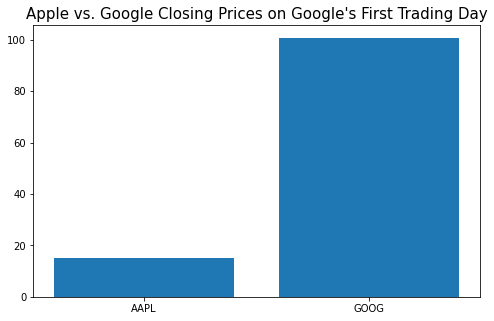

In [11]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create a bar chart.
# plt.bar() will create a vertical bar chart.
plt.bar(['AAPL', 'GOOG'], # We have to specify our X labels/location.
        [aapl_close_2004[1666], goog_close_2004[7852]]) # We have to specify the Y height.

# Add a title and show the plot.
plt.title('Apple vs. Google Closing Prices on Google\'s First Trading Day', {'fontsize': 15});

**If you are reporting one or two numbers**, then:
- simply state the numbers, or
- compare numbers using a bar chart.

What you choose to do depends on the time and energy you have.

Remember that it is usually a bad idea to just report one number!

Let's compare multiple numbers in a bar chart.

**Example 2:** Let's say we want to compare the maximum closing price for various tickers. 

In the book *Storytelling with Data*, the author talks about utilizing color and text in order to tell a story. Let's walk through that process.

In [12]:
# find the maximum closing price for Nike

max_nke = stocks[stocks['ticker']=='NKE']['close'].max()

In [13]:
# maximum closing price for Google

max_goog = stocks[stocks['ticker']=='GOOG']['close'].max()

In [13]:
# maximum closing price for Starbucks

max_sbux = stocks[stocks['ticker']=='SBUX']['close'].max()

In [14]:
# maximum closing price for Yahoo

max_yhoo = stocks[stocks['ticker']=='YHOO']['close'].max()

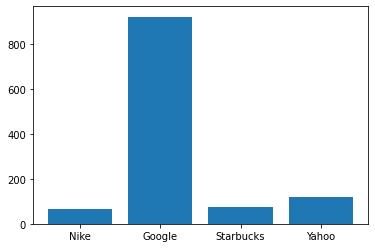

In [15]:
plt.bar(['Nike', 'Google', 'Starbucks', 'Yahoo'],
        [max_nke, max_goog, max_sbux, max_yhoo]);

<details><summary>What are some things we can add to make this visualization better?</summary>
    
- Add a descriptive title
- Add axis labels
- Make plot bigger
</details>

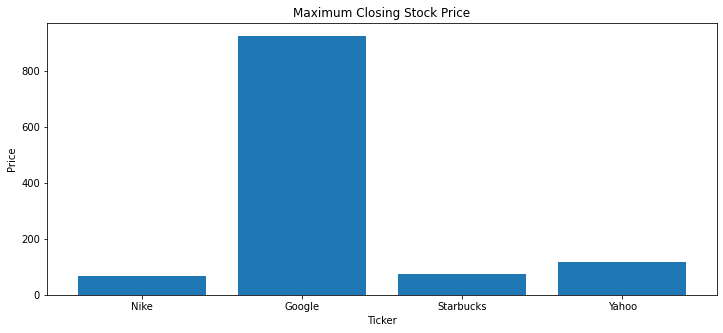

In [16]:
# make bigger
plt.figure(figsize = (12, 5))

plt.bar(['Nike', 'Google', 'Starbucks', 'Yahoo'],
        [max_nke, max_goog, max_sbux, max_yhoo])

# add title
plt.title('Maximum Closing Stock Price')
plt.xlabel('Ticker') # add x axis label
plt.ylabel('Price'); # add y axis label

<details><summary>What do you want your stakeholders to see in this visualization?</summary>
    
- Google has a much higher maximum closing price than the others
</details>

We can use color and text to tell our story.

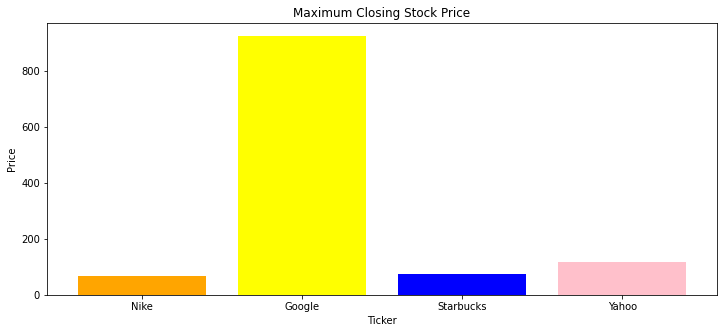

In [17]:
plt.figure(figsize = (12, 5))

# add some colors
plt.bar(['Nike', 'Google', 'Starbucks', 'Yahoo'],
        [max_nke, max_goog, max_sbux, max_yhoo],
        color = ['orange', 'yellow', 'blue', 'pink'])

plt.title('Maximum Closing Stock Price')
plt.xlabel('Ticker')
plt.ylabel('Price');

Adding random color doesn't help us much, other than potentially making your plot more visually appealing. We can use color to draw the audience's eyes where we want them to look.

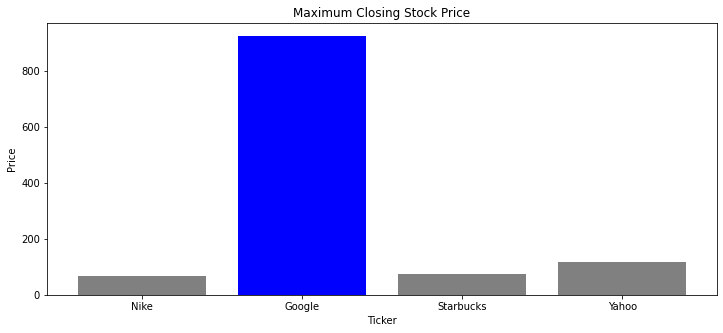

In [18]:
plt.figure(figsize = (12, 5))

# add some colors
plt.bar(['Nike', 'Google', 'Starbucks', 'Yahoo'],
        [max_nke, max_goog, max_sbux, max_yhoo],
        color = ['grey', 'blue', 'grey', 'grey'])

plt.title('Maximum Closing Stock Price')
plt.xlabel('Ticker')
plt.ylabel('Price');

We can also use text to tell the audience what we want them to learn from our visualizations.

In [19]:
# how much higher is the google price than the next highest?

max_goog - max_yhoo

805.17

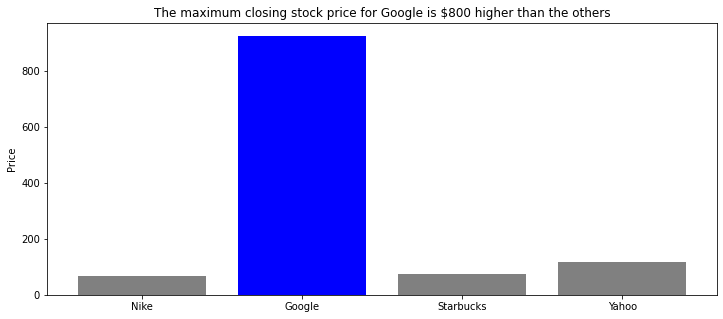

In [20]:
plt.figure(figsize = (12, 5))

plt.bar(['Nike', 'Google', 'Starbucks', 'Yahoo'],
        [max_nke, max_goog, max_sbux, max_yhoo],
        color = ['grey', 'blue', 'grey', 'grey'])

# create a descriptive title that tells a story
plt.title('The maximum closing stock price for Google is $800 higher than the others')
# , {'fontsize': 15} to make title font larger
plt.ylabel('Price');

---

#### Commonly, we want to visualize *distributions*.
- The **distribution** of a variable is 1) the set of all values of that variable and 2) how frequently we observe each value.

![](../images/household_income.png)

- This is a visual representation of all of our data. We can then use this to answer lots of other questions.
    - What is the likeliest income for a household to have?
    - What is the range of incomes?
    - How likely is it that a household has an income above 50,000 dollars? Between 100,000 and 150,000 dollars?

### If your goal is to visualize the distribution of one variable, then:
- if that variable is qualitative: **use a bar chart**.
- if that variable is quantitative: **use a histogram**.

**Example 3**: Suppose we wanted to visualize the distribution of stock tickers. (That is, how many values did we observe for each ticker?)

In [21]:
stocks['ticker'].value_counts()

YHOO    3926
INTC    3926
NKE     3926
DOW     3926
AAPL    3926
SBUX    3926
GOOG    2260
NDAQ    2139
Name: ticker, dtype: int64

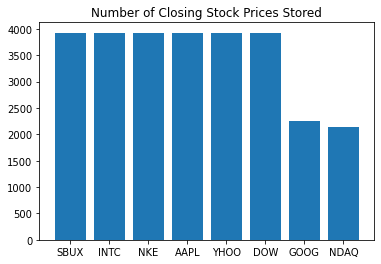

In [22]:
# Create a bar chart.
# plt.bar() will create a vertical bar chart.
# We have to pass in our X (labels) and Y (values).
plt.bar(['SBUX', 'INTC', 'NKE', 'AAPL', 'YHOO', 'DOW', 'GOOG', 'NDAQ'],
        stocks['ticker'].value_counts())

# Add a title and show the plot.
plt.title('Number of Closing Stock Prices Stored');

**Example 4**: Suppose we wanted to visualize the distribution of stock values but write out the name instead of using the stock ticker. What's the problem here?

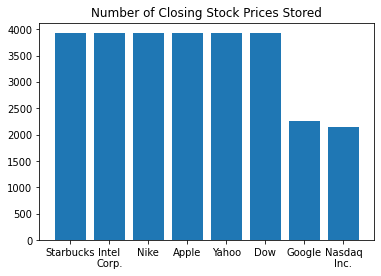

In [23]:
# Create a bar chart.
# plt.bar() will create a vertical bar chart.
# We have to pass in our X (labels) and Y (values).
plt.bar(['Starbucks', 'Intel\nCorp.', 'Nike', 'Apple', 'Yahoo', 'Dow', 'Google', 'Nasdaq\nInc.'],
        stocks['ticker'].value_counts())

# Add a title and show the plot.
plt.title('Number of Closing Stock Prices Stored');

**Example 5**: Suppose we wanted to visualize the distribution of stock values but write out the name instead of using the stock ticker. We can get around the above issue by creating a **horizontal bar chart**.

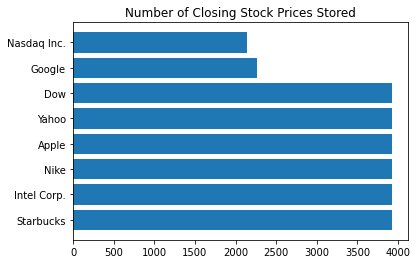

In [24]:
# plt.barh() will create a horizontal bar chart. (Note the h at the end of bar!)
# We have to pass in our values and labels again. Luckily, we don't need to swap the order!

plt.barh(['Starbucks', 'Intel Corp.', 'Nike', 'Apple', 'Yahoo', 'Dow', 'Google', 'Nasdaq Inc.'],
         stocks['ticker'].value_counts())

plt.title('Number of Closing Stock Prices Stored');

**Example 6**: Suppose we wanted to visualize the distribution of closing stock prices for `SBUX`. Since this is a quantitative variable, we will use a **histogram**.

In [25]:
# Return all closing stock prices for SBUX ticker
stocks[stocks['ticker'] == 'SBUX']['close']

20103     4.43040
20104     4.40787
20105     4.23009
20106     4.11156
20107     4.23721
           ...   
24024    73.76000
24025    72.80000
24026    72.25000
24027    72.99000
24028    72.80000
Name: close, Length: 3926, dtype: float64

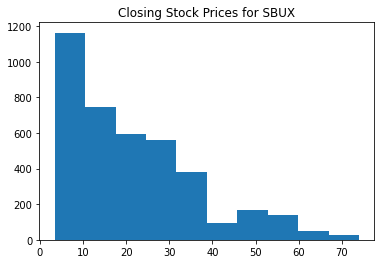

In [26]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'])
plt.title('Closing Stock Prices for SBUX');

In [27]:
stocks[stocks['ticker'] == 'SBUX']['close'].describe()

count    3926.000000
mean       21.644001
std        14.793992
min         3.444280
25%         9.671480
50%        17.994200
75%        29.533600
max        73.989300
Name: close, dtype: float64

- Note that histograms are easier to produce. When dealing with qualitative variables, we need to tell our bar chart what the X values are. When dealing with quantitative variables, the histogram can infer what it is!
- However, also note that histograms can vary wildly based on how many bins ("categories") there are.

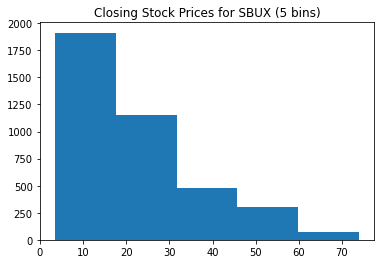

In [28]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins = 5)
plt.title('Closing Stock Prices for SBUX (5 bins)');

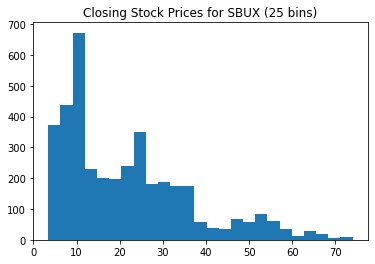

In [29]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=25)
plt.title('Closing Stock Prices for SBUX (25 bins)');

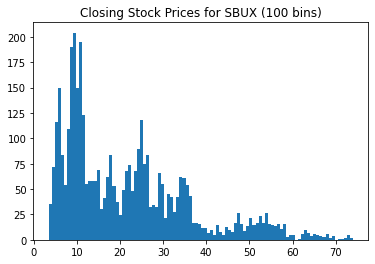

In [30]:
plt.hist(stocks[stocks['ticker'] == 'SBUX']['close'], bins=100)
plt.title('Closing Stock Prices for SBUX (100 bins)');

There is no best number of bins and any guidelines about number of bins will usually depend on the shape of the data. 
- ***My "best practice" recommendation***: Add a kernel density estimate (`kde`) that will attempt to estimate what the true probability density function (pdf) will look like. This can be done (easily) in `seaborn`, a Python visualization library built on top of `matplotlib`.

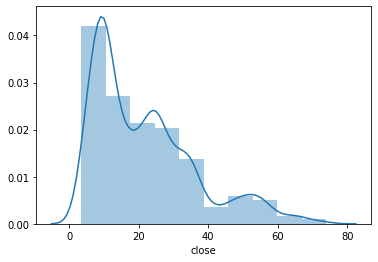

In [31]:
sns.distplot(stocks[stocks['ticker'] == 'SBUX']['close'], bins=10, kde = True);

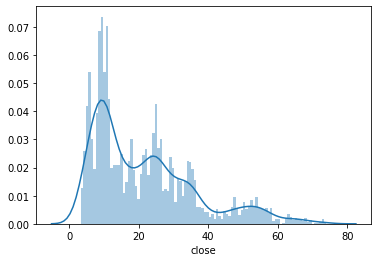

In [32]:
sns.distplot(stocks[stocks['ticker'] == 'SBUX']['close'], bins=100, kde = True);

- ***My "best practice" recommendation***: Note that a kernel density estimate might be confusing to some stakeholders (clients, boss, etc.). Consider using `kde = True` only for exploratory visualization.
    
---

**Practice**: Visualize the distribution of `GOOG` closing prices. Generate it with a kernel density estimate and tweak the number of bins to get as close to the kde as possible, then generate your plot in a way you'd likely present it to a stakeholder.

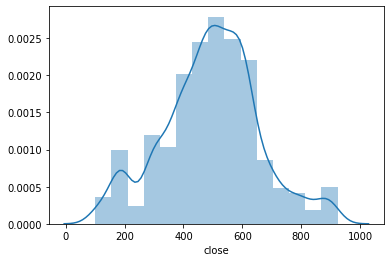

In [33]:
sns.distplot(stocks[stocks['ticker'] == 'GOOG']['close'], bins=15, kde = True);

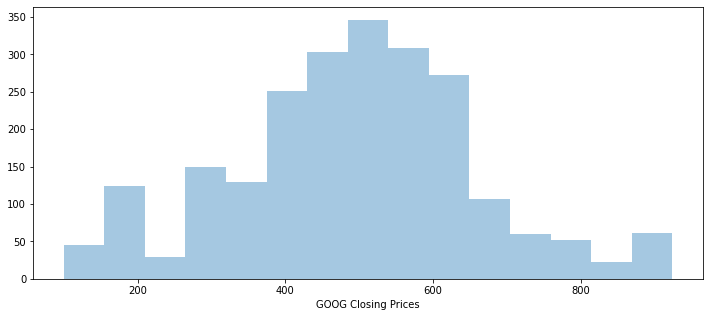

In [34]:
plt.figure(figsize = (12, 5))
sns.distplot(stocks[stocks['ticker'] == 'GOOG']['close'], bins=15, kde = False, axlabel = 'GOOG Closing Prices');

**If your goal is to visualize the distribution of one variable**, then:
- if that variable is qualitative: use a bar chart.
- if that variable is quantitative: use a histogram.

Remember that if you are visualizing with a histogram, then your number of bins might substantially affect how your distribution looks, especially for small sample sizes. Consider using a kernel density estimate to help you visualize a smooth distribution of your data during your **exploratory** phase, but you *may* want to exclude the kde for your **explanatory** (reporting) phase.

## Bonus (Optional): Text

Suppose we wanted to quantify the performance of the AAPL stock over time.

In [15]:
# Save values from above as variables
# AAPL Closing Stock Price on January 2, 1998. 
close_1998 = stocks[(stocks['date'] == '1998-01-02') & (stocks['ticker'] == 'AAPL')]['close']

# AAPL Closing Stock Price on August 9, 2013.
close_2013 = stocks[(stocks['date'] == '2013-08-09') & (stocks['ticker'] == 'AAPL')]['close']

In [16]:
# Percent change formula: 100 * (value_2 - value_1) / |value_1|

aapl_pct_change = 100 * (close_2013[3925] - close_1998[0]) / close_1998[0]

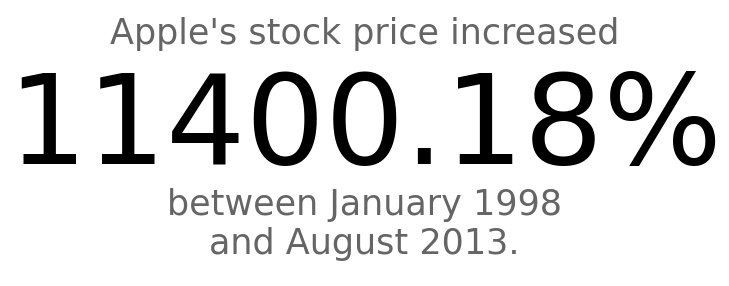

In [17]:
# Set size of figure: eight by five.
plt.figure(figsize=(8, 5))

# Create text:
plt.text(x = 0.5,                              # at horizontal = 0.5
         y = 0.9,                              # at vertical = 0.9
         s = 'Apple\'s stock price increased', # content of text (string)
         ha = 'center',                        # center-aligned horizontally
         va = 'center',                        # center-aligned vertically
         size = 35,                            # font size = 35
         alpha = 0.6)                          # alpha = 0.6 --> 60% opaque; 40% clear


# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 125
# alpha = 1 --> totally opaque

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(aapl_pct_change, 2)) + '%',
         ha = 'center',
         va = 'center',
         size = 125,
         alpha = 1)

# Create text:
# at (horizontal = 0.5, vertical = 0.25)
# stating "between January 1998 and August 2013"
# with a line break in between "1998" and "and"
# center-aligned
# font size 35
# alpha = 0.6 --> 40% clear; 60% opaque
plt.text(x = 0.5,
         y = 0.2,
         s = 'between January 1998\nand August 2013.',
         ha = 'center',
         va = 'center',
         size = 35,
         alpha = 0.6)

# No axes.
plt.axis('off');

It is often a bad idea to simply report one number. By giving only one number, we can often be misleading. Let's avoid this!
- I got a 74% on my last exam.
    - I got a 74% on my last exam. The class average was a 56%.
- There were 62,984,828 votes cast for Trump in the 2016 Presidential election.
    - There were 65,853,514 votes cast for Clinton and 62,984,828 votes cast for Trump in the 2016 Presidential election.
- Our company earned 5MM (five million) dollars last year.
    - Our company earned 5MM last year. This is our highest yet; our company had an average of 2MM in revenue over all previous years.


- ***My "best practice" recommendation***: Rather than reporting one number, provide context by comparing multiple numbers.

---

Identifying the right combination of `figsize`, `x`, `y`, `size`, line breaks (`\n`) in `s`, and so on will mostly be done through guess-and-check. 
- ***My "best practice" recommendation***: copy what exists now to your next use, then tweak as needed!

---
Report that `GOOG` (Google) grew from 100.76 in August 2004 to 890.31 in August 2013. (I've given you the `goog_pct_change` below.) Be sure to compare it to another number!

In [18]:
# save DOW Closing Stock Price on January 2, 1998 as variables
dow_close_1998 = stocks[(stocks['date'] == min(stocks['date'])) & (stocks['ticker'] == 'DOW')]['close']

# DOW Closing Stock Price on August 9, 2013.
dow_close_2013 = stocks[(stocks['date'] == max(stocks['date'])) & (stocks['ticker'] == 'DOW')]['close']

In [39]:
goog_pct_change = 100 * (890.31 - 100.76) / (100.76)
dow_pct_change = 100 * (dow_close_2013[7851] - dow_close_1998[3926]) / dow_close_1998[3926]

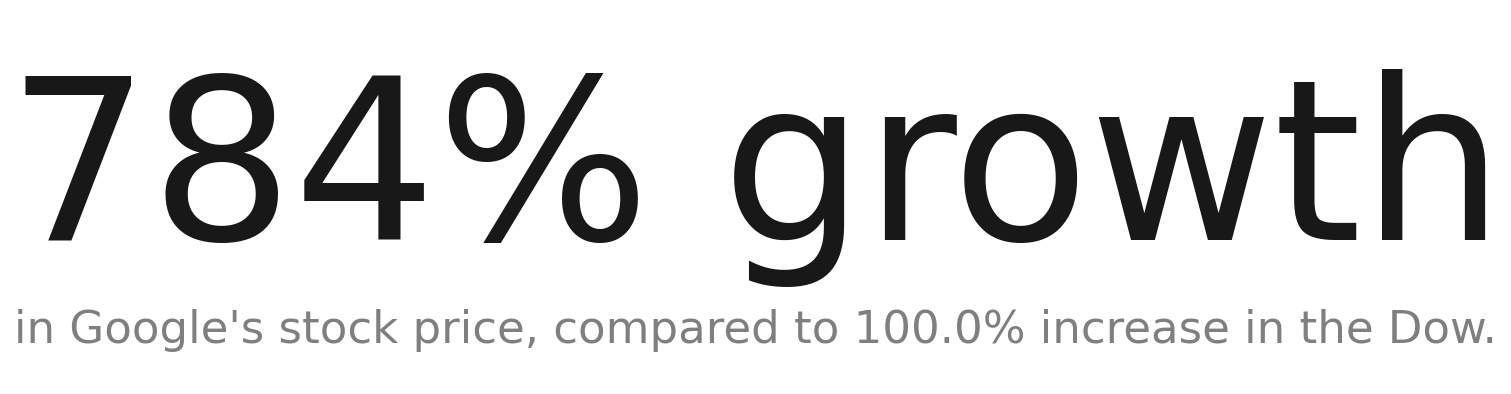

In [40]:
# Set size of figure: ten by seven.
plt.figure(figsize=(10, 7))

# Create text:
# at (horizontal = 0.5, vertical = 0.55)
# stating the percent change (s means string)
# center-aligned
# font size 225
# alpha = 0.9

plt.text(x = 0.5,
         y = 0.55,
         s = str(round(goog_pct_change)) + '% growth',
         ha = 'center',
         va = 'center',
         size = 225,
         alpha = 0.9)

# Create text:
# at (horizontal = 0.5, vertical = 0.15)
# stating "in Google's stock price, compared to 100% increase in the Dow."
# center-aligned
# font size 45
# alpha = 0.5
plt.text(x = 0.5,
         y = 0.15,
         s = 'in Google\'s stock price, compared to ' + str(round(dow_pct_change)) + '% increase in the Dow.',
         ha = 'center',
         va = 'center',
         size = 45,
         alpha = 0.5)

# No axes.
plt.axis('off');

As Einstein said, "Everything should be as simple as it can be, but not simpler." This is pretty simple. If it works... use it!
- It's not lost in a table.
- It's very clearly calling out what we want to emphasize.
- Understanding `x`, `y`, `fontsize`, etc. will be helpful later if we want to annotate a plot with text.

![](../images/wordart.png)

---